# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.


Tujuan

Proyek ini befokus pada Exploratory Data Analysis(EDA) dan Data Visualization. Analisis yang dilakukan yaitu menentukan hubungan antara harga sebuah mobil dengan usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Selanjutnya ditentukan faktor yang paling memengaruhi harga kendaraan. Data dianalisis menggunakan teknik statistik atau alat visualisasi untuk mengidentifikasi pola atau tren serta untuk mengungkap insights dalam data.

Hipotesis

1. Mobil yang memiliki usia yang lebih tua memiliki harga mobil yang lebih murah.
2. Jarak tempuh mobil yang lebih kecil memiliki harga mobil yang lebih murah.
3. Mobil dengan kondisi yang bagus memiliki harga mobil yang lebih mahal.
4. Tipe transmisi mobil matic lebih mahal daripadi tipe transisi mobil manual.
5. Warna-warna yang tidak umum, seperti kuning, hijau, biru, merah, cenderung kurang peminat.    Ini menjadikan dari segi harga tidak sebaik warna hitam, putih atau silver.

Tahapan

Data tentang spesifikasi mobil disimpan dalam file /datasets/vehicles_us.csv. Tidak ada informasi terkait kualitas data tersebut, jadi perlu dilakukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Proyek ini terdiri dari dua tahap:

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)



## Pra-pemrosesan

[Muat *library* yang Anda yakini akan dibutuhkan untuk proyek ini. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import numpy as np

### Memuat Data

[Muat data proyek ini dan baca informasi umumnya.]

In [2]:
# Muat file data menjadi DataFrame
df=pd.read_csv('/datasets/vehicles_us.csv')
df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.shape

(51525, 13)

In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
# tampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


missing data pada:
1. model_year (float64) =47906
2. cylinders (float64) =46265
3. odometer (float64) =43633
4. paint_color (object/string) =42258
5. is_4wd (float64) =25572
total jumlah rows sebenarnya ada 51525
kolom is_4wd paling banyak mengalami kehilangan data (50.37%).

Core parameter untuk kasus ini terdapat pada kolom price dimana kolom model_year, odometer, paint_color mempunyai pengaruh besar terhadad harga jual. Tentunya perlu ada kolom tambahan guna mempertajam analisa seperti rata-rata jarak tempuh dibandingkan dengan umur mobil dan sudah berapa lama diiklankan sampai terjual (semakin lama terjual dari tanggal iklan menyiratkan jenis mobil tersebut kurang diminati pasar).
Dengan kata lain, untuk kolom model_year, odometer dan paint_color sebaiknya nilai yang hilang ditelaah lebih jauh (apakah berpola atau tidak) dan tidak mudah untuk dihilangkan begitu saja. 
Sedangkan untuk kolom cylinder dan is_4wd sebaiknya dilihat lebih jauh apakah benar tidak ada pengaruh besar, berpola atau tidak terhadap nilai jual karena bisa saja kualitas atau model dari cylinder maupun roda penggerak (is_4wd) dipandang penting dalam penjualan mobil bekas di daerah tertentu. 

In [7]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [8]:
df.duplicated().sum()

0

[Apakah terdapat kolom dengan tipe data yang tidak sesuai?]

Type kolom date_posted masih berbentuk string/object. Akan lebih memudahkan analisa perhitungan jika diubah menjadi to_datetime agar dapat dipecah menjadi tanggal dan tahun jika diperlukan.

Nilai yang hilang terdapat di beberapa kolom saja (umur mobil), cylinder, jarak tempuh (odometer), jenis warna cat mobil dan jenis roda penggerak (is_4wd). 
Paling banyak terdapat di kolom is_4wd. Kemungkinan nilai hilang ini adala kesalahan teknis pencatatan atau bisa saja disengaja karena tidak ada data (surat kendaraan tidak lengkap, karena dalam kasus ini tidak semua mobil baru sehingga kemungkinan sebagian mobil bekas). Untuk itu kolom yang memiliki nilai hilang sebaiknya diselesaikan dengan mencari hubungannya dengan kolom-kolom terkait dan jika perlu (karena tidak ada kaitan signifikan dengan harga jual mobil) dihilangkan saja atau diberi tanda 'unknown'.  

In [9]:
df.isna().sum()/df.shape[0]*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Berikan penjelasan lebih baik lagi. Lihat saran reviewer

</div>

In [10]:
df['model_year'].value_counts(dropna=False)

NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1949.0       1
1954.0       1
1936.0       1
1961.0       1
Name: model_year, Length: 69, dtype: int64

In [11]:
df['cylinders'].value_counts(dropna=False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [12]:
df['odometer'].value_counts(dropna=False)

NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
280499.0       1
49814.0        1
194920.0       1
140800.0       1
269527.0       1
Name: odometer, Length: 17763, dtype: int64

In [13]:
df['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [14]:
df['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

### Kesimpulan dan Langkah-Langkah Selanjutnya

[Rumuskan kesimpulan Anda tentang data awal. Menurut Anda apa yang terlihat normal dan apa yang tidak?] 
[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini. Khususnya, Anda harus menyatakan dengan jelas bagian data mana yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan.]

kolom yang memuat NaN: 
1. model_year --> NaN akan diubah menjadi median (karena std 6.282065, berarti distribusi data tidak terlalu mendekat di mean, jadi median lebih prudent dalam hal ini) dengan perbandingan dengan model dan model_year. 
2. cylinders --> karena std nya kecil (hanya 6.125235, berarti distribusi datanya banyak di dekat nilainya mean), maka untuk NaN akan diubah menjadi nilai rata-rata hasil perbandingan dengan model mobil dan model karena tipe cylinders tergantung dari tipe mobilnya. 
3. odometer --> nilai std besar yaitu 115553.461738 dan karena jumlah NaN ada 15%, jadi NaN akan diubah menjadi median berdasarkan perbandingan dengan kolom model_year dan condition.
4. paint_color --> NaN akan diubah menjadi unknown karena dtype string.
5. is_4wd --> NaN dijadikan dtypes bool karena hanya ada 2 jenis nilai 

untuk kolom date_posted akan diubah menjadi to_datetime

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

[Pelajari nilai yang hilang untuk setiap kolom secara lebih detail dan putuskan apa yang harus dilakukan dengan nilai tersebut berdasarkan hipotesis.]

PAINT_COLOR

In [15]:
df['paint_color'].fillna('unknown', inplace=True)
df['paint_color'].isna().sum()

0

Type kolom paint_color adalah object/string oleh karena itu nilai yang hilang tidak memungkinkan diganti dengan nilai median maupun rata-rata. Walaupun jumlah NaN cukup besar yaitu ada 9267 data namun karena tipe datanya string maka memilih untuk mengganti NaN dengan 'unknown' lebih prudent dibandingkan dengan memilih mengganti data dengan kategori numerik karena tidak ada referensi bahwa warna putih lebih berharga atau lebih tinggi harganya daripada merah. Secara logis, pengaruh warna cat mobil terhadap harga jual tidak berdiri sendiri tetapi ada umur mobil (model_year), tipe mobil (model), berapa km (jarak tempuh/odometer) dan kondisi (mesin, service dll.).

IS_4WD

In [16]:
df['is_4wd'].fillna(0, inplace=True)
df['is_4wd'].isna().sum()

0

In [17]:
df_is_4wd = df.pivot_table(index='is_4wd', values='price', aggfunc= 'count')
df_is_4wd

,price
is_4wd,
0.0,25953
1.0,25572


In [18]:
df['is_4wd'] = df['is_4wd'].astype(bool)
df['is_4wd'].dtypes

dtype('bool')

In [19]:
df['is_4wd'].value_counts(dropna=False)

False    25953
True     25572
Name: is_4wd, dtype: int64

In [20]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Pada kolom is_4wd ini isinya hanya ada 1.0 dan NaN. Nilai yang hilang ini tidak dihilangkan maupun diganti dengan 'unknown' (walaupun tidak ada keterangan bahwa NaN ini adalah non 4wd, karena ini hanya berdasarkan data di atas kertas) karena akan jauh lebih mudah untuk menganalisa jika diganti menjadi tipe data 'bool' dengan pilihan True=4wd dan False=non 4wd. 

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Berikan penjelasan agar saya bisa melihat dengan lebih baik lagi sejauh mana pemahaman kamu terkait apa yang kamu lakukan. Lihat saran reviewer

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Keren banget

</div>

MODEL_YEAR

In [21]:
#melihat distribusi data kolom model_year dibandingkan dengan model
df.groupby(['model', 'model_year'])['model_year'].count()

model              model_year
acura tl           1999.0         3
                   2001.0         6
                   2002.0         2
                   2003.0        10
                   2004.0        16
                                 ..
volkswagen passat  2014.0        44
                   2015.0        26
                   2016.0        10
                   2017.0        10
                   2018.0         1
Name: model_year, Length: 2226, dtype: int64

In [22]:
df['model_year'] = df.groupby(['model'])['model_year'].transform(lambda x: x.fillna(x.median()))
df['model_year'].isna().sum()

0

NaN pada model_year diganti dengan median karena berdasarkan data di atas bahwa suatu model mobil dikeluarkan dalam kurun waktu kurang lebih 5 tahun.

ODOMETER

In [23]:
#Memeriksa nilai 'median' pada 'odometer' berdasarkan 'model_year' dan 'condition'
df.groupby(['model_year', 'condition'])['odometer'].value_counts()

model_year  condition  odometer
1908.0      good       169328.0    1
1936.0      excellent  30000.0     1
1948.0      like new   4000.0      1
1949.0      good       1800.0      1
1954.0      excellent  3565.0      1
                                  ..
2019.0      new        5000.0      1
                       8002.0      1
                       9000.0      1
                       10000.0     1
            salvage    9621.0      1
Name: odometer, Length: 27428, dtype: int64

In [24]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year','condition'])['odometer'].transform('median'))
df['odometer'].isna().sum()

7

masih ada 7 baris yang NaN

In [25]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))
df['odometer'].isna().sum()

1

masih ada 1 baris yang NaN

In [26]:
#satu baris yang kosong diisi dengan nilai terdekat berdasarkan nilai pada kolom model_year
df['odometer'] = df.groupby('model_year')['odometer'].apply(lambda x: x.interpolate(method='nearest')).ffill()        
df['odometer'].isna().sum()

0

CYLINDERS

In [27]:
df['cylinders'].value_counts(dropna=False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [28]:
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model','model_year'])['cylinders'].transform('mean'))
df['cylinders'].isna().sum()

26

masih ada 26 rows NaN

In [29]:
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('mean'))
df['cylinders'].isna().sum()

0

Kolom cylinders setidaknya bergantung pada jenis dan tahun release mobil, namun (mungkin) karena terlalu banyak parameter sehingga NaN masih tersisa 26 baris maka diambil perbandingan hanya dengan jenis mobil saja. Nilai rata-rata diambil menggantikan NaN karena hal ini (diyakini) lebih prudent (karena keterkaitan tadi dengan jenis dan tahun release mobil dimana ujung-ujungnya berpengaruh ke harga jual) dibandingkan harus dihilangkan. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


NaN sudah dimitigasi sehingga semua kolom sekarang telah siap untuk dianalisa lebih lanjut. 

## Memperbaiki Tipe Data

[Karena data kurang lebih telah lengkap, maka perbaiki tipe datanya jika dibutuhkan.]

In [31]:
df['model_year']=df['model_year'].astype(int)

In [32]:
df['cylinders']=df['cylinders'].astype(int)

In [33]:
df['date_posted'] = pd.to_datetime(df.date_posted, format='%Y-%m-%d')

In [34]:
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Seperti telah dijelaskan di awal, kolom date_posted akan lebih baik dan mudah untuk analisa selanjutnya jika diubah dtypey (to_datetime) sehingga dapat dipecah menjadi tanggal atau tahun sesuai kebutuhan analisa. Sedangkan untuk model_year dan cylinders dtypes diubah menjadi integer untuk memudahkan perhitungan (tidak banyak koma). 

## Memperbaiki Kualitas Data

[Berikan faktor tambahan pada data agar lebih mudah dianalisis.]

In [35]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['dayofweek_posted']=df['date_posted'].dt.weekday
df['month_posted']=df['date_posted'].dt.month
df['year_posted']=df['date_posted'].dt.year

Untuk memudahkan melihat dataFrame dan analisa maka dari kolom date_posted dipecah (ditambahkan kolom baru pada dataFrame) menjadi berdasarkan hari, bulan dan tahun. 

In [36]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['vehicle_age'] = (df['year_posted']+1) - df['model_year']

Kolom umur kendaraan ditambahkan agar pembaca dapat langsung mengenali berapa lama usia mobil yang diiklankan. Ditambah 1 pada year_posted karena tahun pada saat diiklankan ikut dihitung. 

In [37]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_distance']=df['odometer'] / df['vehicle_age']
df['avg_distance']=np.round(df['avg_distance'])

rata-rata jarak tempuh (tentunya berdasarkan usia kendaraan) ditambahkan agar pembaca dapat langsung membandingkan harga jual dan rata-rata km kendaraan. Pembulatan angka agar mudah dibaca. 

In [38]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
df['condition'].value_counts()


excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

<div class="alert alert-danger">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Kode yang tidak dibutuhkan bisa dihapus yaa agar lembar notebookmu lebih rapi

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Keren banget

</div>

In [39]:
condition_rate = {
    'salvage' : 0, 
    'fair' : 1, 
    'good' : 2, 
    'excellent' : 3, 
    'like new' : 4, 
    'new' : 5
}

In [40]:
df['condition'] = df['condition'].map(condition_rate)

In [41]:
df_condition = df.pivot_table(index='condition', values='price', aggfunc= 'count')
df_condition

,price
condition,
0,115
1,1607
2,20145
3,24773
4,4742
5,143


Mengkategorikan kondisi mobil menjadi kode angka yang memudahkan untuk menganalisa. Bisa saja tidak diubah, tergantung dari referensi si pembaca data. 

## Memeriksa Data yang Sudah Bersih

[Mengingat data sudah siap untuk dianalisis, mari kita lihat data Anda sekilas lagi. Sangat berguna untuk melihat apa yang sebenarnya akan Anda gunakan untuk analisis.]

In [42]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  dayofweek_posted  51525 non-null  int64         
 14  month_posted      5152

1. Semua NaN sudah dimitigasi (terlihat semua kolom memiliki 51525) dan kolom-kolom penunjang untuk analisa lebih lanjut sudah ditambahkan (dari awal 13 kolom sekarang menjadi 18 kolom)
2. Dtypes sudah disesuaikan untuk analisa

## Mempelajari Parameter Inti 
[Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.]

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Model 
- Kondisi

[Jika Anda merasa perlu untuk mengulangi pekerjaan yang sama beberapa kali, pikirkan tentang instrumen pengkodean apa yang mungkin berguna untuk hal tersebut guna menghindari penduplikasian kode Anda.]

parameternya adalah: 
1. price
2. model
3. vehicle_age
4. avg_distance
5. condition_general

<div class="alert alert-warning">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Import package seharusnya dikumpulkan dalam 1 cell code di awal notebook yaa

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Keren banget

</div>

Text(0, 0.5, 'ads or frequency')

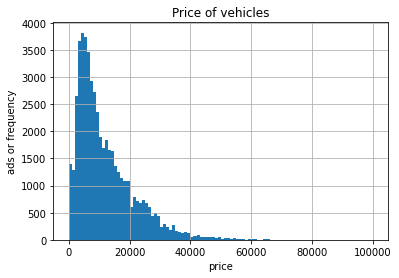

In [43]:
df.hist('price', bins=100, range=(0,100000))
plt.title('Price of vehicles')
plt.xlabel('price')
plt.ylabel('ads or frequency')

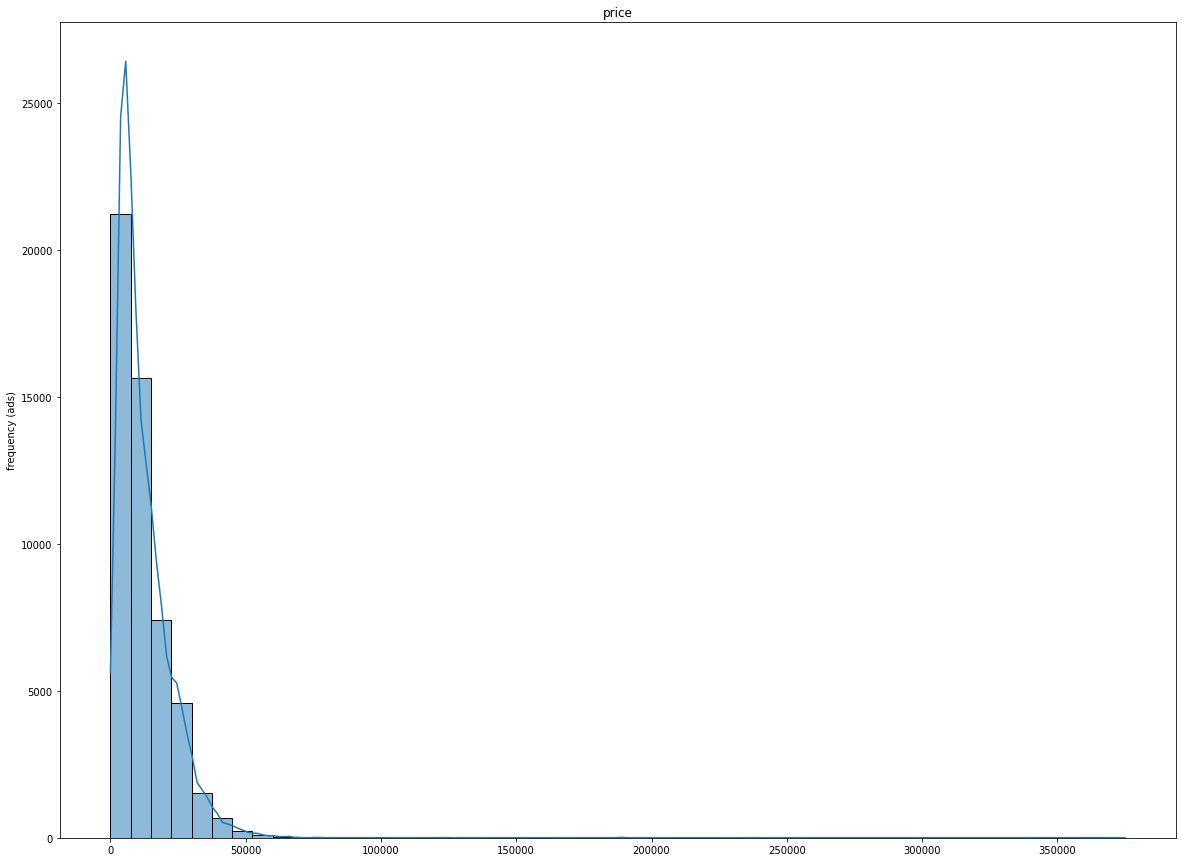

In [44]:
for column in ['price']:
    plt.figure(figsize=(20,15))
    sns.histplot(df[column], bins=50, kde=True)
    plt.xlabel('')
    plt.ylabel('frequency (ads)')
    plt.title(column)
    plt.show()

Text(0, 0.5, 'price')

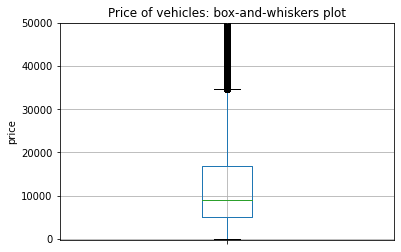

In [45]:
df.boxplot('price')
plt.ylim(-350, 50000)
plt.title('Price of vehicles: box-and-whiskers plot')
plt.xticks([1], [''])
plt.ylabel('price')

Harga 0 dan diatas ca.34000 merupakan outliers, dan mayoritas car price berkumpul di sekitar harga 10.000

Text(0, 0.5, 'frequency')

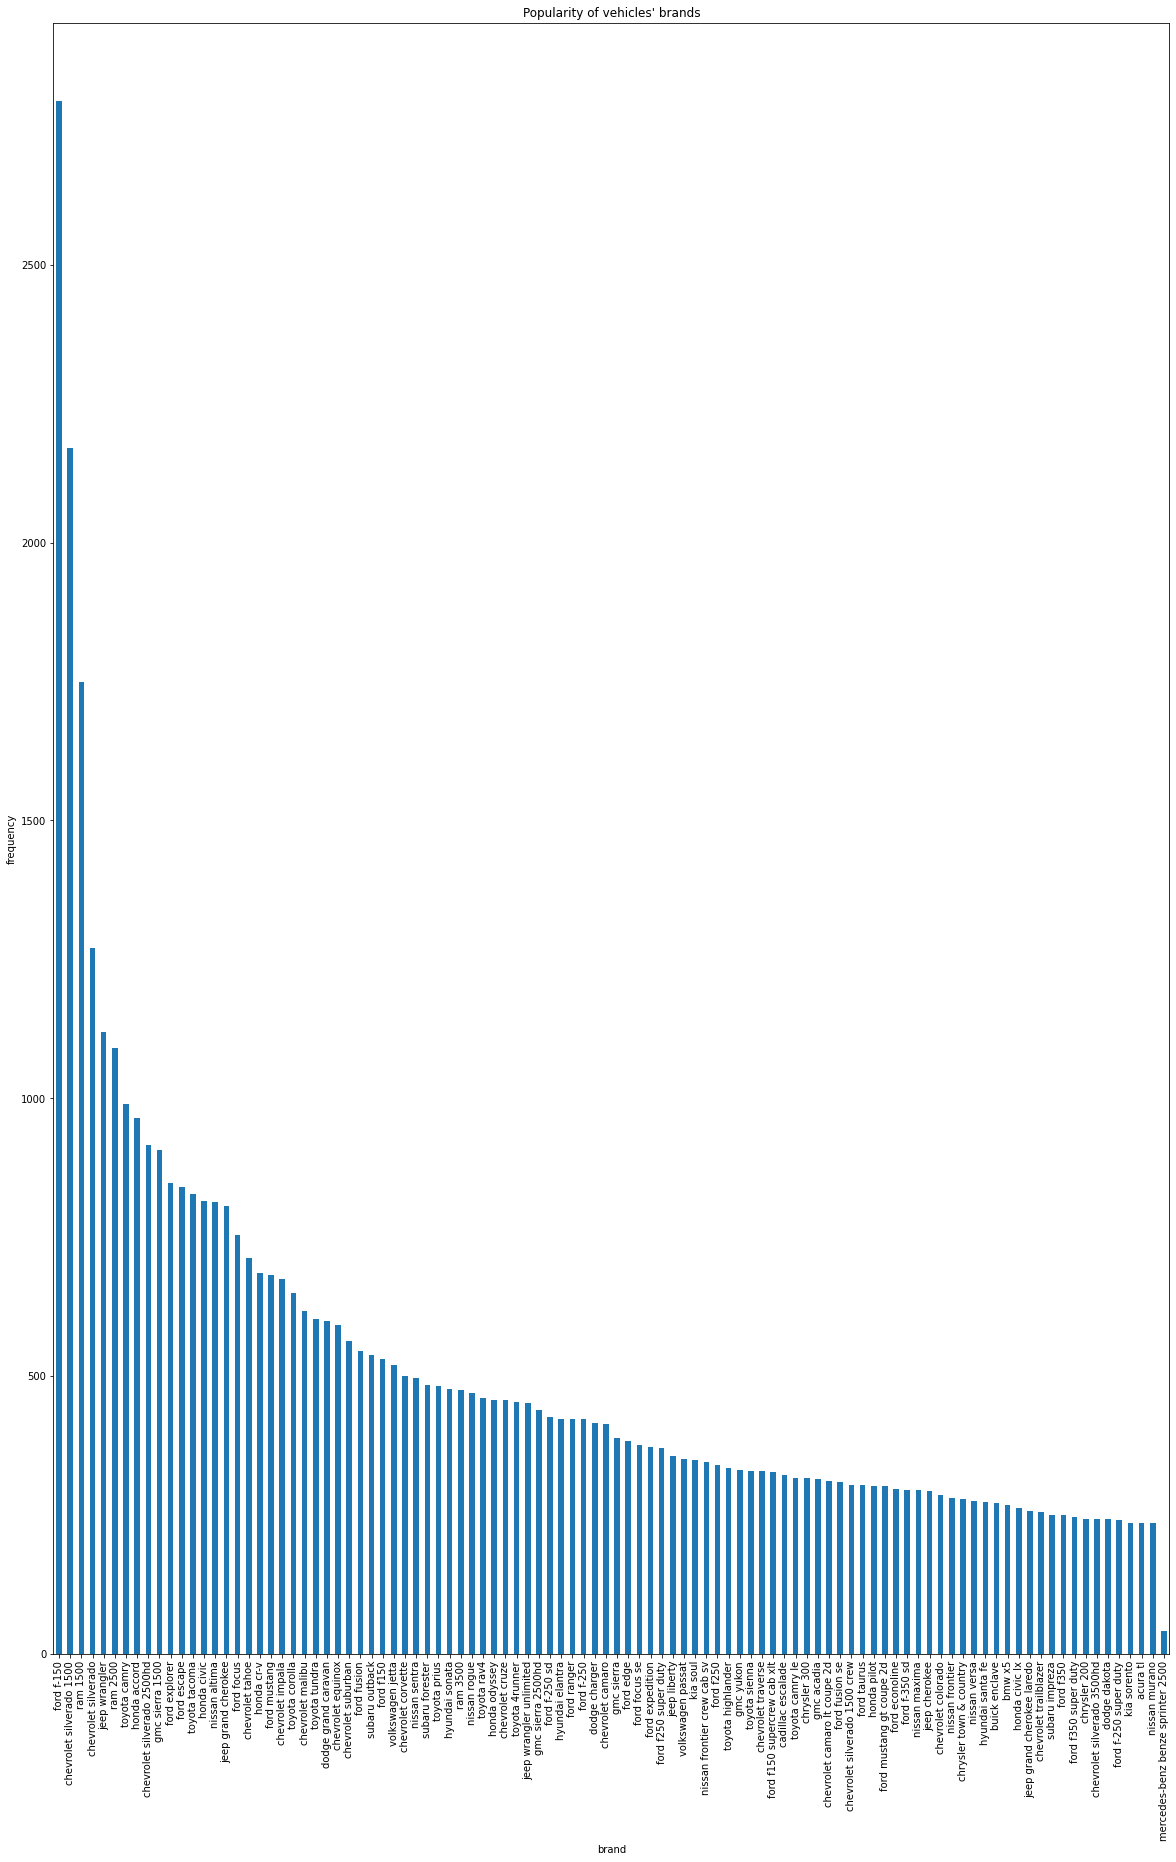

In [46]:
df['model'].value_counts().plot(kind='bar', figsize=(20,30))
plt.title("Popularity of vehicles' brands")
plt.xlabel('brand')
plt.ylabel('frequency')

Model ford f-150 merupakan mobil yang sering diiklankan dan mendominasi penjualan diikuti oleh chevrolet silverado 1500 dan ram 1500.

Text(0, 0.5, 'ads or frequency')

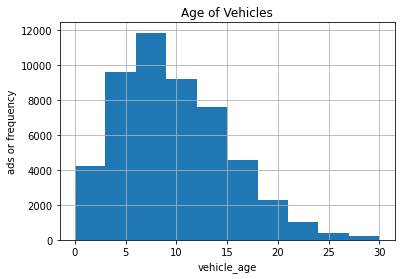

In [47]:
df.hist('vehicle_age', bins=10, range=(0,30))
plt.title('Age of Vehicles')
plt.xlabel('vehicle_age')
plt.ylabel('ads or frequency')

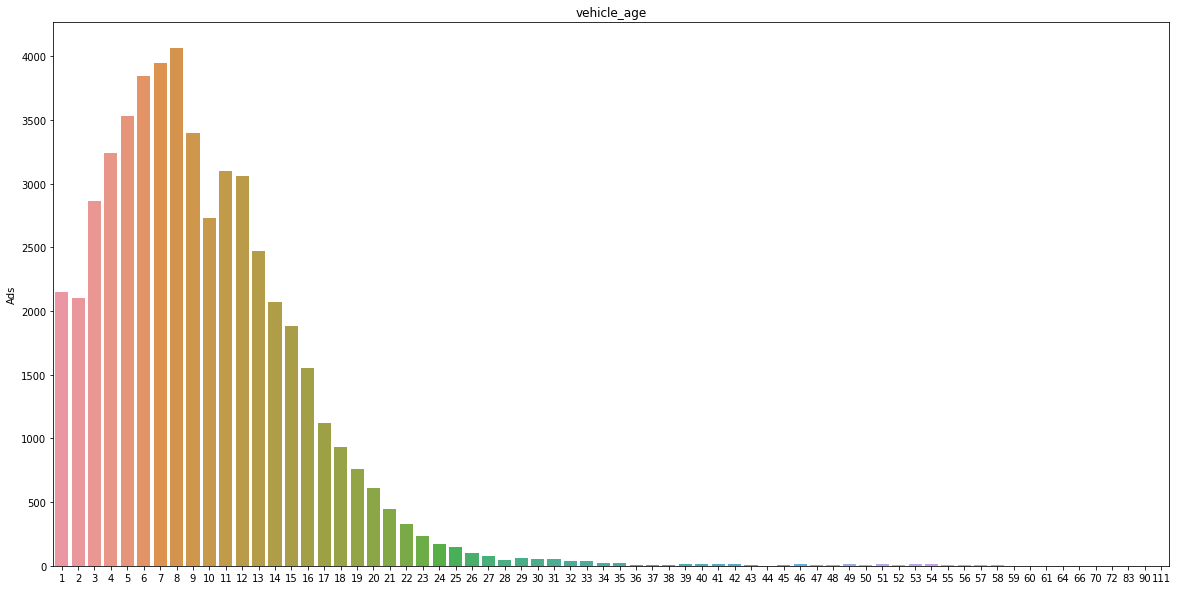

In [48]:
for column in ['vehicle_age']:
    plt.figure(figsize=(20,10))
    sns.countplot(x=column, data=df)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()

verhicle age mobil yang paling banyak diiklankan berumur 5-7 tahun (atau sesuai dengan diagram batang maka vehicle age 7 tahun yang paling dominan terjual) kondisi mobil yang paling banyak diiklankan adalah 'good' dan 'excellent'.

Text(0, 0.5, 'ads or frequency')

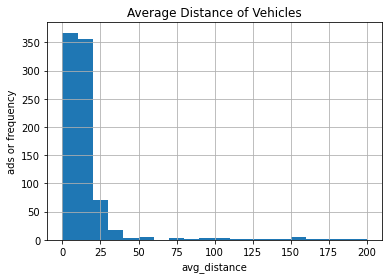

In [49]:
df.hist('avg_distance', bins=20, range=(0,200))
plt.title('Average Distance of Vehicles')
plt.xlabel('avg_distance')
plt.ylabel('ads or frequency')

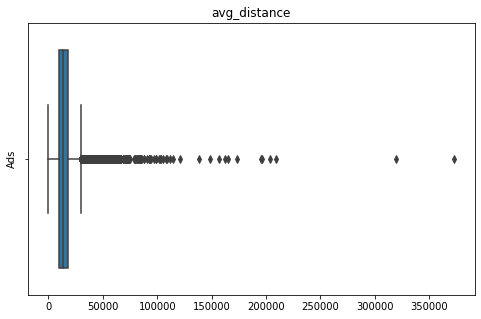

In [50]:
for column in ['avg_distance']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=column)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show() 

Melihat histogram average distance (jarak tempuh mobil dalam 1 tahun) menunjukkan rata-rata berkisar 11000-22000 atau sesuai nilai median circa 15000.   

Text(0, 0.5, 'frequency')

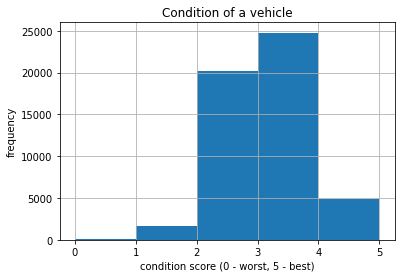

In [51]:
df.hist('condition', bins=5)
plt.title("Condition of a vehicle")
plt.xlabel('condition score (0 - worst, 5 - best)')
plt.ylabel('frequency')

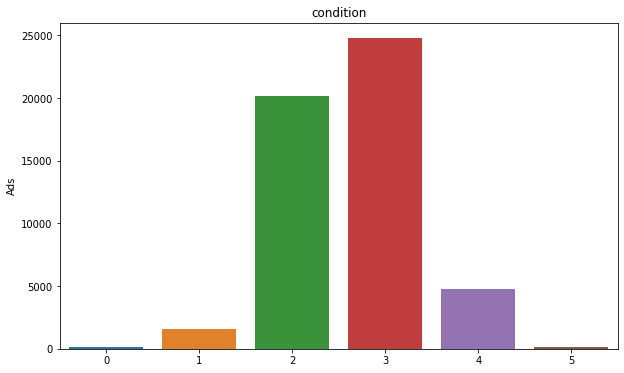

In [52]:
for column in ['condition']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, data=df)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()

Kondisi mobil yang paling sering diiklankan (paling laku terjual) adalah kondisi 'excellent'

Text(0, 0.5, 'frequency')

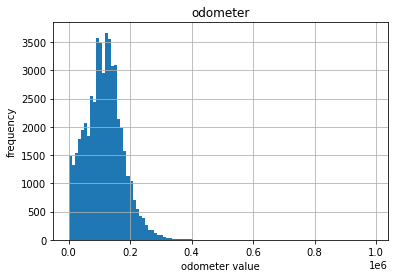

In [53]:
df.hist('odometer', bins=100)
plt.title("odometer")
plt.xlabel('odometer value')
plt.ylabel('frequency')

Histogram odometer (jarak tempuh saat iklan ditayangkan):
1. 0 menunjukkan kondisi mobil 'new'
2. menunjukkan bahwa mobil dengan nilai median (circa 115000 atau pada histogram 0.1) merupakan nilai odometer paling domminan dari mobil yang diiklankan atau laku terjual. 

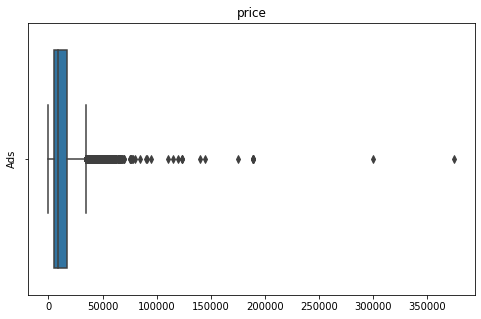

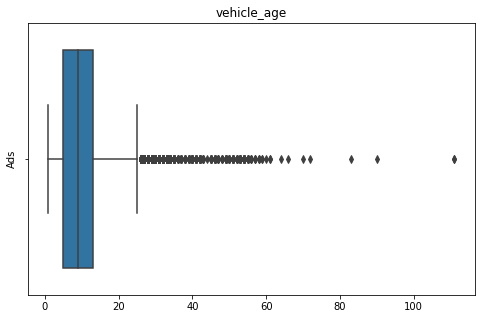

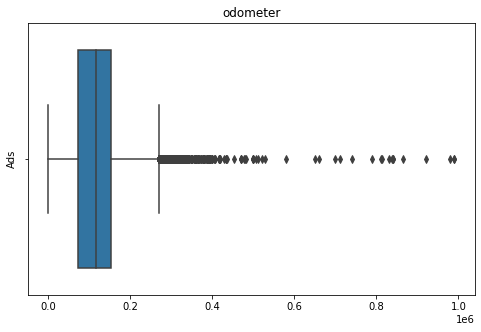

In [54]:
for column in ['price', 'vehicle_age', 'odometer']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=column)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show() 

In [55]:
df_columns=['price','vehicle_age','odometer','avg_distance']

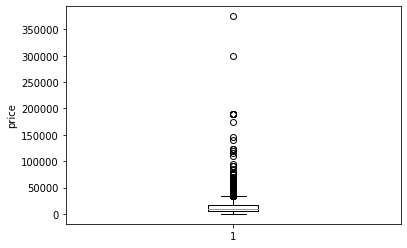

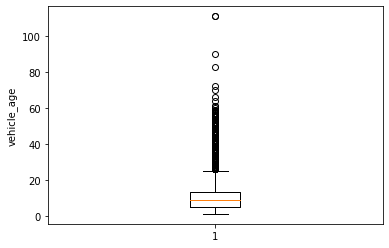

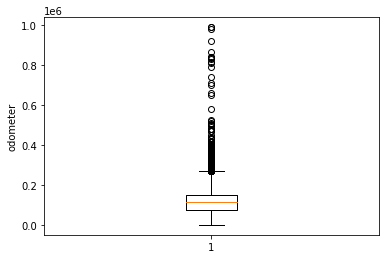

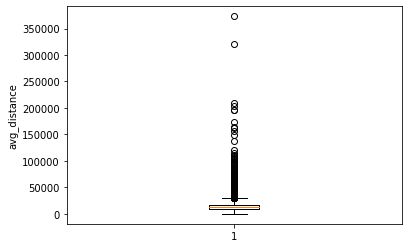

In [56]:
for column in df_columns:
    fig, ax = plt.subplots()
    ax.boxplot(df[column])
    plt.xlabel('')
    plt.ylabel(column)
    plt.show()

Berdasarkan boxplot: 
1. Harga mobil berkisar < $50.000. Untuk harga 0 (ini pasti outlier) dan diatas circa 40.000 adalah outlier 
2. Umur mobil yang diiklankan berkisar antara 5 sd <20 tahun. Diatas circa 25 tahun adalah outlier. Untuk yang umur kendaraan 0 adalah mobil baru (kemungkinan besar)
3. Jarak tempuh kendaraan <200.000 (sekitar 100.000), diatas circa 250.000 adalah outlier. Sedangkan yang bernilai 0 adalah mobil baru atau belum pernah dipakai. 

In [57]:
df.odometer.value_counts(ascending=False)

97078.0     367
106602.0    343
149000.0    339
119339.0    331
90401.0     314
           ... 
103221.0      1
172525.0      1
182100.0      1
133277.0      1
269527.0      1
Name: odometer, Length: 17820, dtype: int64

## Mempelajari dan Menangani Outlier

[Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.]

Dengan hasil pembacaan beberapa parameter sebelumnya, kolom yang mungkin berisi outlier yaitu price, avg_distance, dan vehicle_age. Langkah selanjutnya dibuat DataFrame tanpa outlier tersebut. Outlier dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.

In [58]:
outlier_columns = ['price', 'vehicle_age', 'avg_distance']

In [59]:
# Tentukan batas bawah dan atas outlier 

def upper_lower_whisker(column):
    Q1  = df[column].quantile(0.25)
    Q3  = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

df_final = df.copy()

In [60]:
for column in outlier_columns:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    df_final = df_final[(df_final[column] > lower) & (df_final[column] < upper )]
    print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  vehicle_age
cleaning outlier on  vehicle_age  was finished!
start cleaning outlier on  avg_distance
cleaning outlier on  avg_distance  was finished!


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46966 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             46966 non-null  int64         
 1   model_year        46966 non-null  int64         
 2   model             46966 non-null  object        
 3   condition         46966 non-null  int64         
 4   cylinders         46966 non-null  int64         
 5   fuel              46966 non-null  object        
 6   odometer          46966 non-null  float64       
 7   transmission      46966 non-null  object        
 8   type              46966 non-null  object        
 9   paint_color       46966 non-null  object        
 10  is_4wd            46966 non-null  bool          
 11  date_posted       46966 non-null  datetime64[ns]
 12  days_listed       46966 non-null  int64         
 13  dayofweek_posted  46966 non-null  int64         
 14  month_posted      4696

Setelah outliers dihilangkan pada 3 kolom price, vehicle_age dan avg_distance (yang dianggap penting) maka baris pada dataFrame berkurang dari 51525 menjadi hanya 49242 baris saja. 

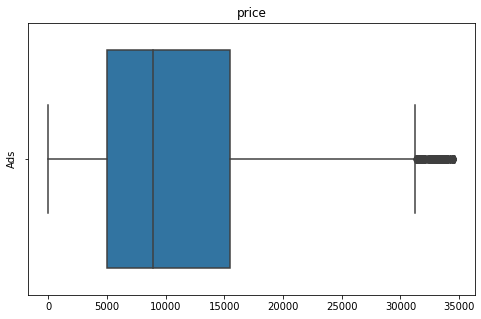

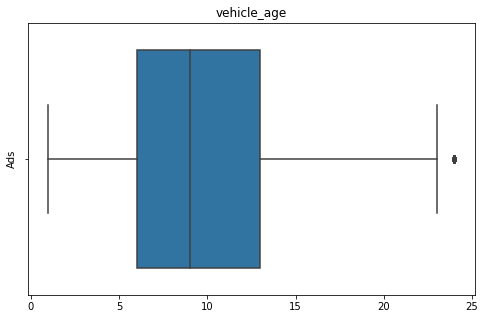

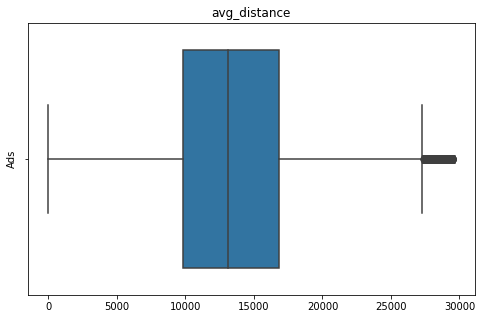

In [62]:
for column in ['price', 'vehicle_age', 'avg_distance']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_final, x=column)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show() 

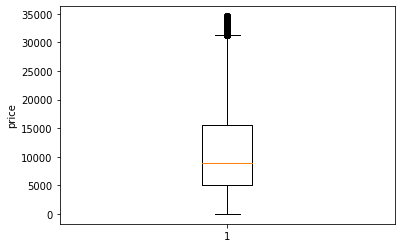

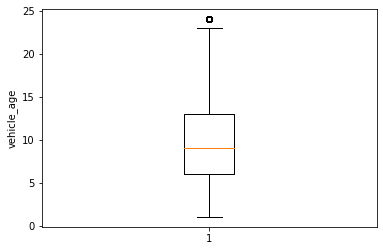

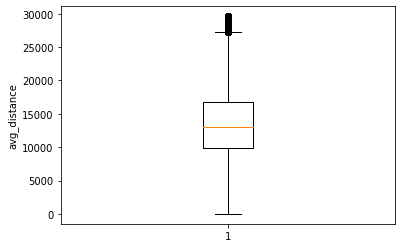

In [63]:
for column in outlier_columns:
    fig, ax = plt.subplots()
    ax.boxplot(df_final[column])
    plt.xlabel('')
    plt.ylabel(column)
    plt.show()

Ternayata masih ada outliers tapi jumlahnya sudah turun drastis daripada sebelumnya. 

## Mempelajari Parameter Inti Tanpa Outlier

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

In [64]:
df_final.describe()

,price,model_year,condition,cylinders,odometer,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance
count,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000,46966.000000
mean,10978.882915,2009.777520,2.623387,6.027573,116556.909977,39.552485,3.004195,6.592407,2018.313248,9.535728,13494.075438
std,7754.696689,4.975242,0.702454,1.636557,59052.165187,28.227070,1.995717,3.483093,0.463819,4.980647,5597.529617
min,1.000000,1995.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,4995.000000,2007.000000,2.000000,4.000000,77000.000000,19.000000,1.000000,3.000000,2018.000000,6.000000,9833.000000
50%,8900.000000,2010.000000,3.000000,6.000000,116596.500000,33.000000,3.000000,7.000000,2018.000000,9.000000,13083.000000
75%,15500.000000,2014.000000,3.000000,8.000000,152260.750000,53.000000,5.000000,10.000000,2019.000000,13.000000,16818.000000
max,34595.000000,2019.000000,5.000000,12.000000,527835.000000,271.000000,6.000000,12.000000,2019.000000,24.000000,29625.000000


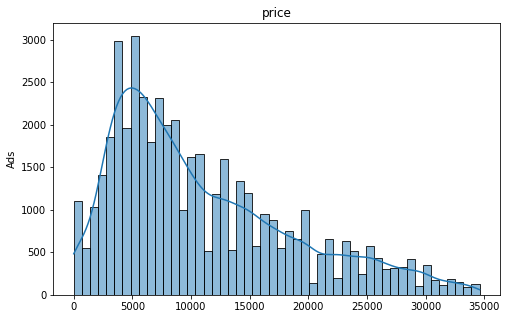

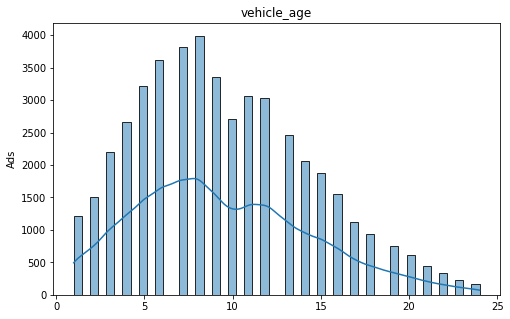

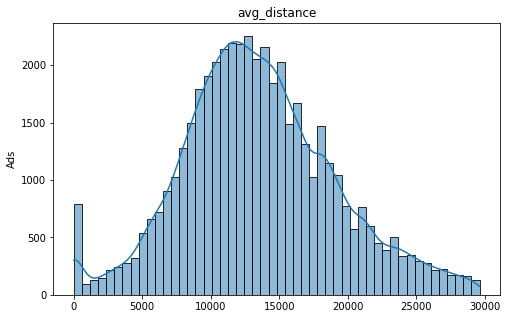

In [65]:
core_parameter = ['price', 'vehicle_age', 'avg_distance']

for column in core_parameter:
    plt.figure(figsize=(8,5))
    sns.histplot(df_final[column], bins=50, kde=True)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()

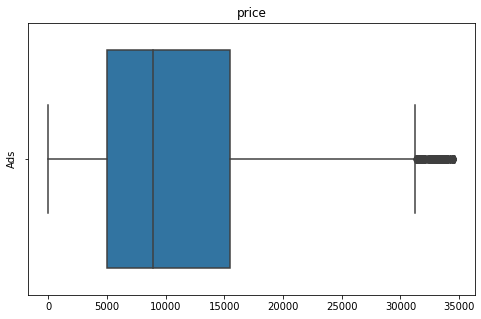

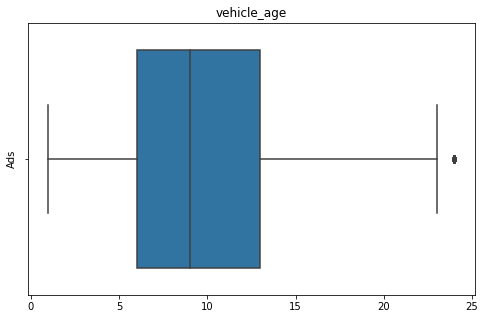

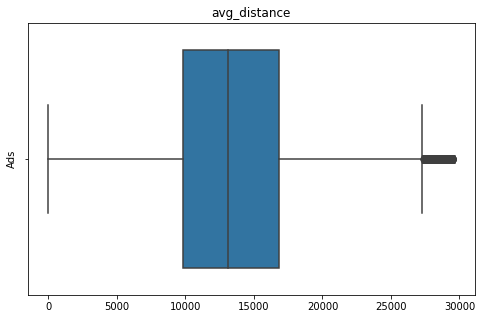

In [66]:
for column in ['price', 'vehicle_age', 'avg_distance']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_final, x=column)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()

Dengan membuang outliers menjadikan tampilan boxplot lebih sederhana untuk dibaca dan ada pergeseran nilai seperti pada kolom price dimana Q3 menjadi sekitar 16000 dari sebelumnya sekitar 19000. Kesimpulan: dengan menghilangkan outliers maka nilai tercermin lebih realistik dan mengurangi distorsi nilai sehingga bisa menimbulkan salah persepsi di lapangan. 

<div class="alert alert-success">
<b>Chamdani's comment v.2</b> <a class="tocSkip"></a>

Keren banget

</div>

## Masa Berlaku Iklan 
[Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat, dan kapan iklan ditayangkan dalam waktu yang sangat lama.]

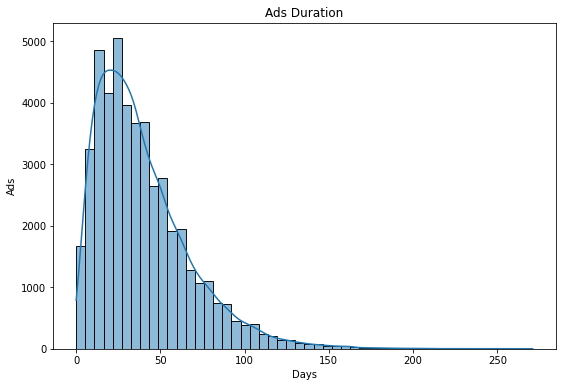

In [67]:
plt.figure(figsize=(9,6))
sns.histplot(df_final['days_listed'], bins=50, kde=True)
plt.xlabel('Days')
plt.ylabel('Ads')
plt.title('Ads Duration')
plt.show()

Masa berlaku iklan dari 0 sampai dengan maksimal sekitar >150 hari. 

In [68]:
df_final['days_listed'].describe()

count    46966.000000
mean        39.552485
std         28.227070
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

rata-rata iklan ditayangkan ca.40 hari dan mediannya 33 hari. Umumnya sekitar 75% adalah 53 hari.

In [69]:
too_fast = 1
too_long = 150

perfect_days_listed = df_final.query('@too_fast <= days_listed <= @too_long')

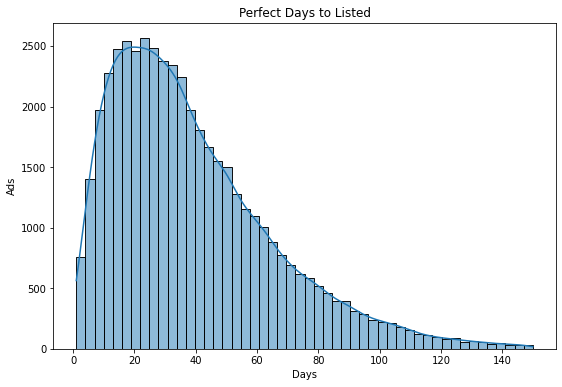

In [70]:
plt.figure(figsize=(9,6))
sns.histplot(perfect_days_listed['days_listed'], bins=50, kde=True)
plt.xlabel('Days')
plt.ylabel('Ads')
plt.title('Perfect Days to Listed')
plt.show()

Iklan ditayangkan dari 0-271 hari. Hari iklan dihapus paling banyak sebelum 50 hari. Rata-rata iklan ditayangkan sebelum dihapus hingga 40 hari. Median iklan ditayangan sebelum dihapus hingga 33 hari. Iklan paling lama ditayangkan hingga 271 hari, sedangkan paling cepat yaitu 0 hari (di hari yang sama langsung dihapus/terjual)

## Harga Rata-Rata Setiap Jenis Kendaraan

[Lakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.]

In [71]:
ads_on_type = df_final.pivot_table(index='type', values='days_listed', aggfunc= 'count')
ads_on_type

,days_listed
type,
SUV,11625
bus,19
convertible,338
coupe,2012
hatchback,984
mini-van,1091
offroad,180
other,221
pickup,6142


Tipe SUV merupakan tipe mobil yang sering diiklankan (ketergatungan pada iklan paling tinggi diantara type lainnya) diikuti oleh sedan.

In [72]:
type_suv = df_final.query('type == "SUV"')

In [73]:
def hist_plot(ct, col, title):
    plt.figure(figsize=(20,10))
    sns.histplot(ct[col], bins=30, kde=True)
    plt.xlabel('price')
    plt.ylabel('frequency ads')
    plt.title(title)
    plt.show()

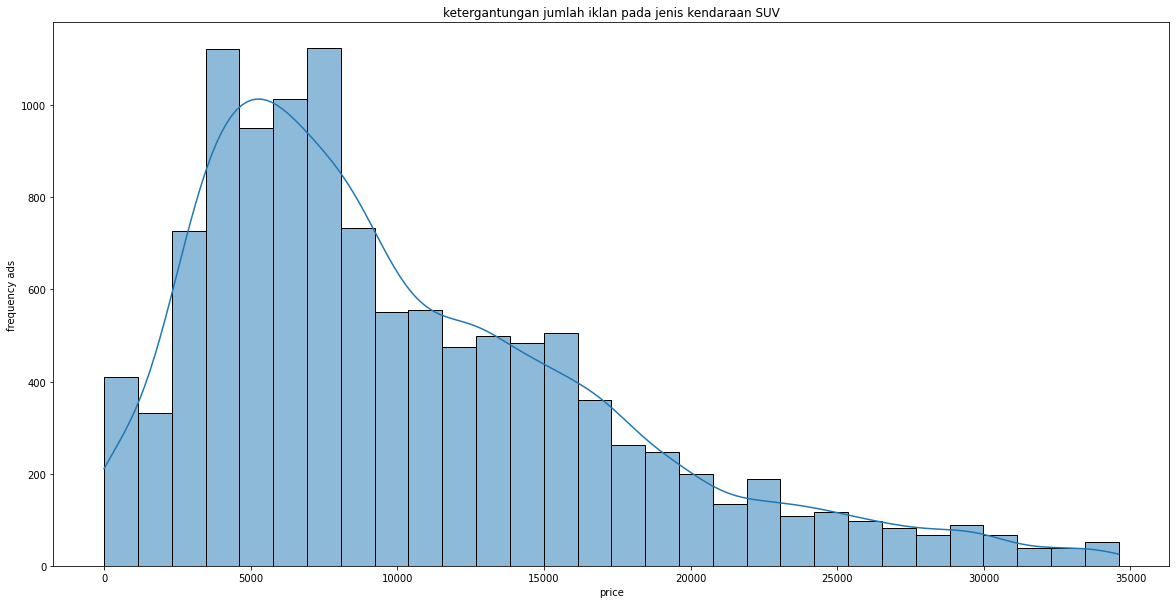

In [74]:
hist_plot(type_suv, 'price', 'ketergantungan jumlah iklan pada jenis kendaraan SUV')

In [75]:
type_suv['price'].describe()

count    11625.000000
mean     10272.087484
std       7067.686926
min          1.000000
25%       4995.000000
50%       8495.000000
75%      14000.000000
max      34595.000000
Name: price, dtype: float64

mean price untuk SUV hampir $10000

In [76]:
type_sedan = df_final.query('type == "sedan"')

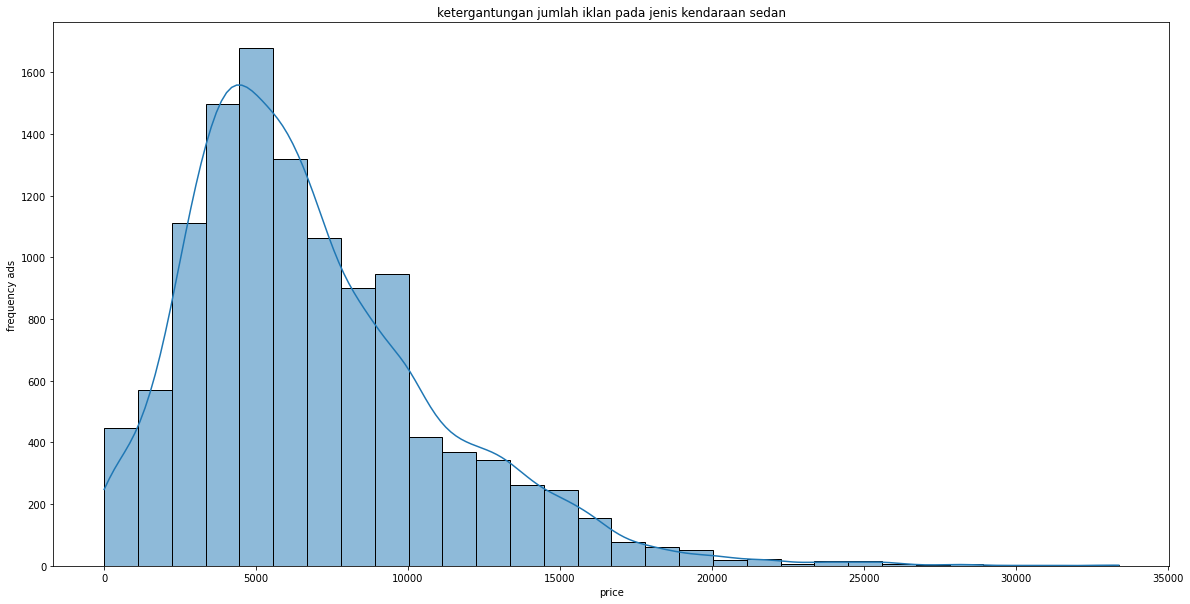

In [77]:
hist_plot(type_sedan, 'price', 'ketergantungan jumlah iklan pada jenis kendaraan sedan')

In [78]:
type_sedan['price'].describe()

count    11600.000000
mean      6820.204741
std       4181.491743
min          1.000000
25%       3950.000000
50%       5995.000000
75%       8995.000000
max      33390.000000
Name: price, dtype: float64

Mean price untuk sedan circa $6600

In [79]:
ads_on_price = df_final.pivot_table(index='price', values='days_listed', aggfunc= 'count')
ads_on_price.sort_values(by=['days_listed'],ascending=False)

,days_listed
price,
1,755
6995,700
5995,632
4995,610
7995,594
...,...
7590,1
19399,1
19395,1


harga rata-rata yang sering diiklankan adalah sekitar $7000

In [80]:
#Harga rata-rata menurut tipe mobil
price_on_type = df_final.pivot_table(index='type',
                                    values='price',
                                    aggfunc='mean', 
                                    )
price_on_type.sort_values(by=['price'], ascending=False)

,price
type,
bus,19276.947368
truck,14706.835963
pickup,14663.802507
offroad,14211.205556
coupe,13464.317097
convertible,12991.704142
SUV,10272.087484
other,10025.167421
wagon,8818.630275


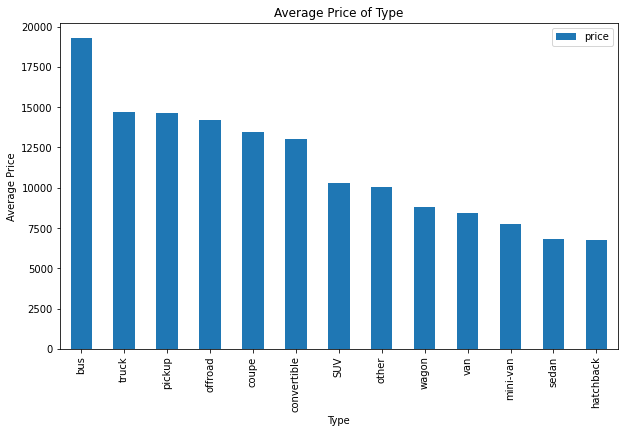

In [81]:
price_on_type.sort_values(by=['price'],ascending=False).plot(kind='bar',figsize=(10, 6))

plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Price of Type')
plt.show()

Iklan terbanyak dalam data yaitu mobil dengan tipe sedan dan SUV. Harga mobil termahal yang dijual yaitu mobil tipe bus dan truck. 

## Faktor Harga

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

[Manfaatkan matriks korelasi dan plot korelasi]

In [82]:
popular_types = df_final[df_final['type'].isin(['SUV', 'sedan'])]

CONDITION VS PRICE

In [83]:
popular_types.condition.value_counts()

3    11976
2     8264
4     2283
1      586
5       60
0       56
Name: condition, dtype: int64

Text(0.5, 1.0, 'Kaitan price dan condition')

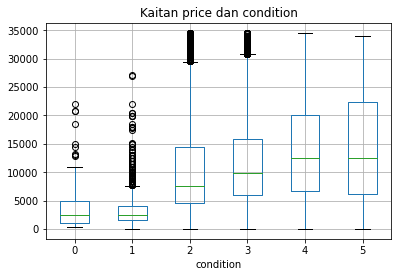

In [84]:
df_final.boxplot(by='condition', column='price')
plt.suptitle('')
plt.title('Kaitan price dan condition')

Boxplot diatas menunjukkan keterkaitan condition dengan price, terutama condition 2-4 menunjukkan price yang semakin tinggi. Dapat disimpulkan bahwa keterkaitan condition dengan harga cukup tinggi, terlihat dari condition 2 dan 3 adalah yang paling banyak dipilih oleh customer.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Great!

</div>

TRANSMISSION VS PRICE

In [85]:
popular_types.transmission.value_counts()

automatic    21914
manual        1028
other          283
Name: transmission, dtype: int64

Text(0.5, 1.0, 'kaitan price dan transmission')

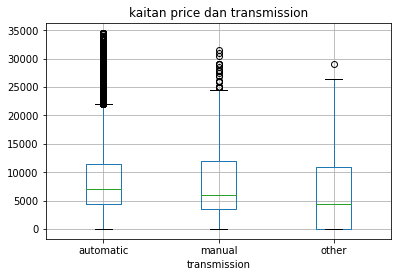

In [86]:
popular_types.boxplot(by='transmission', column='price')
plt.suptitle('')
plt.title('kaitan price dan transmission')

Transmission 'other' memiliki price sedikit lebih mahal dibandingkan 'automatic' dan 'manual transmission'. Namun demikian jumlah customer yang memilih 'automatic' jauh lebih banyak daripada 'other'. Mungkin dalam hal ini, kemudahaan transmission 'automatic' lebih diminati karena kemudahan (praktis) dengan harga yang relatif murah. 

PAINT COLOR VS PRICE

In [87]:
popular_types.paint_color.value_counts()

unknown    4196
black      3735
silver     3431
white      3227
grey       2653
blue       2167
red        1784
green       628
brown       606
custom      580
orange       87
yellow       66
purple       65
Name: paint_color, dtype: int64

Text(0.5, 1.0, 'kaitan price dan paint color')

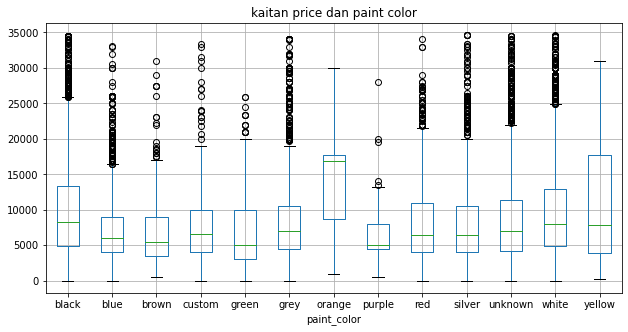

In [88]:
popular_types.boxplot(by='paint_color', column='price', figsize=(10,5))
plt.suptitle('')
plt.title('kaitan price dan paint color')

Paint color 'orange' memiliki harga yang tinggi dibandingkan paint color lainnya diikuti oleh 'yellow'. Meskipun demikian hanya sedikit customers yang memilih warna ini. Justru paint color 'black' yang paling banyak dipilih customer. Dapat disimpulkan bahwa paint color lebih ke preferensi individu. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Great!

</div>

VEHICLE AGE VS PRICE

In [89]:
popular_types.vehicle_age.value_counts()

7     2199
6     1951
8     1896
5     1686
9     1663
12    1626
10    1598
11    1573
4     1317
13    1147
3     1069
14     892
15     819
2      781
16     711
1      526
17     511
18     361
19     279
20     229
21     161
22      99
23      78
24      53
Name: vehicle_age, dtype: int64

Text(0.5, 1.0, 'Kaitan price dan vehicle_age')

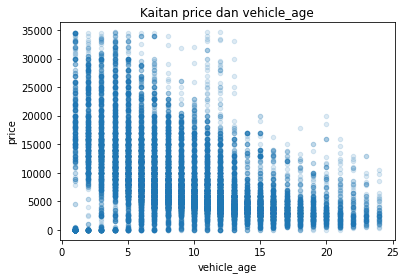

In [90]:
popular_types.plot.scatter(x='vehicle_age', y='price', alpha=.15)
plt.title('Kaitan price dan vehicle_age')

Text(0.5, 1.0, 'Kaitan price dan vehicle age')

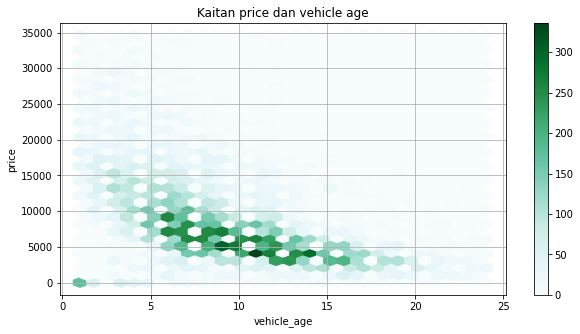

In [91]:
popular_types.plot(x='vehicle_age', y='price', kind='hexbin', gridsize=30, figsize=(10, 5), sharex=False, grid=True)
plt.title('Kaitan price dan vehicle age')

Semakin tua vehicle age maka price juga semakin murah.

ODOMETER VS PRICE

In [92]:
popular_types.odometer.value_counts()

106602.0    186
97078.0     179
78155.0     170
90401.0     158
149000.0    156
           ... 
182629.0      1
87564.0       1
127666.0      1
100501.0      1
221062.0      1
Name: odometer, Length: 9104, dtype: int64

Text(0.5, 1.0, 'Kaitan price dan jarak tempuh')

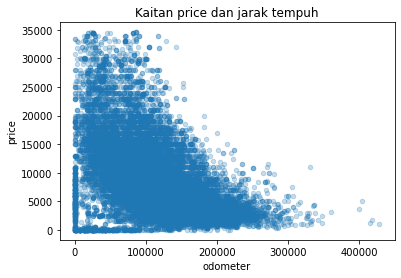

In [93]:
popular_types.plot.scatter(x='odometer', y='price', alpha=.25)
plt.title('Kaitan price dan jarak tempuh')

Text(0.5, 1.0, 'Kaitan price dan average distance of a vehicle')

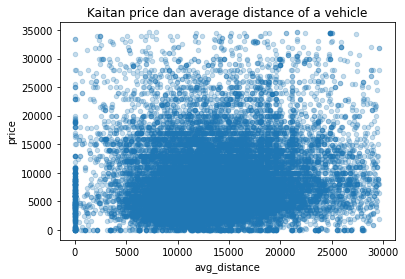

In [94]:
popular_types.plot.scatter(x='avg_distance', y='price', alpha=.25)
plt.title('Kaitan price dan average distance of a vehicle')

In [95]:
popular_types.avg_distance.value_counts()                                   

16180.0    126
15229.0    122
19539.0    120
18080.0    107
14917.0    104
          ... 
21776.0      1
25650.0      1
13590.0      1
22258.0      1
2150.0       1
Name: avg_distance, Length: 8847, dtype: int64

Odometer (jarak tempuh) sebuah mobil menentukan price. Rasional, semakin kecil jarak tempuh maka price juga semakin mahal selain ada faktor model. 

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Great!

</div>

## Kesimpulan Umum
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

PRAPOSES
1. Memulai dengan ukuran dataset sebanyak 51525 baris dan 13 kolom, ada 5 kolom yang terdapat missing value yaitu model_year, cylinders, odometer, paint_color, dan is_4wd.
2. Mitigasi awalnya dengan mengisi nilai dari kolom-kolom yang terdapat missing value, memperbaiki tipe data, memperbaiki kualitas data, dan menambahkan beberapa kolom.

EKSPLORASI
1. Menetapkan batas outliers dari kolom harga, usia, dan average distance, serta membuat dataset baru dengan menghilangkan outliers sehingga jumlah baris menjadi 45429.
2. Memfilter untuk mendapatkan waktu iklan dengan rentang 1 - 150 hari.
3. Tipe mobil yang paling populer adalah SUV.

KONKLUSI
1. Korelasi condition terhadap price adalah tinggi. Condition 2-4 (good, excellent dan like new) menunjukkan price yang semakin tinggi. Dapat disimpulkan bahwa keterkaitan condition dengan harga cukup tinggi, terlihat dari condition 2 dan 3 adalah yang paling banyak dipilih oleh customer.
2. Korelasi condition terhadap price adalah rendah. Transmission 'other' memiliki price sedikit lebih mahal dibandingkan 'automatic' dan 'manual transmission'. Namun demikian jumlah customer yang memilih 'automatic' jauh lebih banyak daripada 'other'. Mungkin dalam hal ini, kemudahaan transmission 'automatic' lebih diminati karena kemudahan (praktis) dengan harga yang relatif murah.
3. Korelasi pint color terhadap price adalah rendah. Paint color 'orange' memiliki harga yang tinggi dibandingkan paint color lainnya diikuti oleh 'yellow'. Meskipun demikian hanya sedikit customers yang memilih warna ini. Justru paint color 'black' yang paling banyak dipilih customer. Dapat disimpulkan bahwa paint color lebih ke preferensi individu.  
4. Korelasi vehicle age terhadap price adalah tinggi. Semakin tua vehicle age maka price juga semakin murah. 
5. Korelasi odometer dengan price adalah tinggi. Odometer (jarak tempuh--sejalan juga dengan average distance) sebuah mobil menentukan price. Rasional, semakin kecil jarak tempuh maka price juga semakin mahal selain ada faktor model.  

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Great!

</div>